In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme("notebook")
%matplotlib inline

In [3]:
df = pd.read_csv("../../data/prepared_data/dataset.csv")
df["datetime"] = pd.to_datetime(df["datetime"])

In [4]:
df_by_machine = df.groupby("machineID")
n_machines = df["machineID"].nunique()
dfs = [] # liste contenant tous les dataframes
for i in range(1,n_machines+1):
    dfs.append(df_by_machine.get_group(i))
df0=dfs[0]

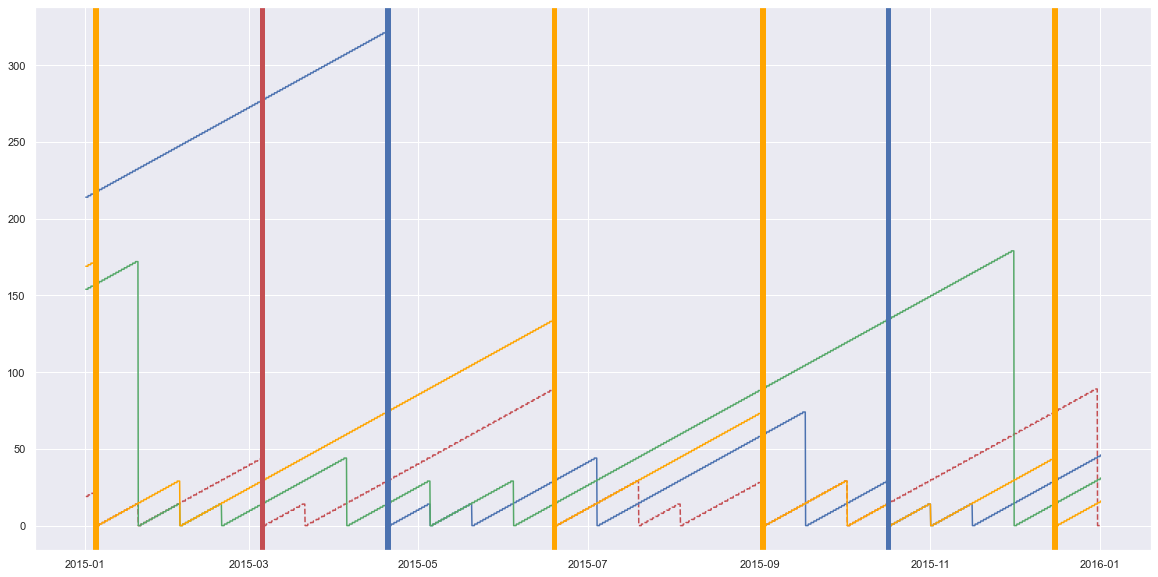

In [17]:
cycle = plt.rcParams['axes.prop_cycle'].by_key()['color']

plt.figure(figsize=(20,10))
plt.plot(df0["datetime"],df0["comp1_delay"],"r--",label="comp1")
plt.plot(df0["datetime"],df0["comp2_delay"],"b",label="comp2")
plt.plot(df0["datetime"],df0["comp3_delay"],"g",label="comp3")
plt.plot(df0["datetime"],df0["comp4_delay"],"orange",label="comp4")
for i,fail in enumerate(df0["comp1"]):
    if fail == 1:
        plt.axvline(x=df0["datetime"][i],c= "r", lw=3)
for i,fail in enumerate(df0["comp2"]):
    if fail == 1:
        plt.axvline(x=df0["datetime"][i],c= "b", lw=3)
for i,fail in enumerate(df0["comp3"]):
    if fail == 1:
        plt.axvline(x=df0["datetime"][i],c= "g", lw=3)
for i,fail in enumerate(df0["comp4"]):
    if fail == 1:
        plt.axvline(x=df0["datetime"][i],c= "orange", lw=3)
plt.show()